In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [2]:
from pycaret.datasets import get_data
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
import pandas as pd
litcovid_dataset = pd.read_csv('/content/drive/MyDrive/Biocreative/Biocreative/litcovid_dataset.csv')

In [ ]:
5print(litcovid_dataset.columns)

Index(['pmid', 'journal', 'title', 'abstract', 'keywords', 'pub_type',
       'authors', 'doi', 'label', 'Case Report', 'Diagnosis',
       'Epidemic Forecasting', 'Mechanism', 'Prevention', 'Transmission',
       'Treatment'],
      dtype='object')


In [ ]:
Df = litcovid_dataset.drop(['pmid', 'journal', 'title', 'keywords', 'pub_type', 'authors', 'doi', 'Case Report', 'Diagnosis', 'Epidemic Forecasting', 'Mechanism', 'Prevention', 'Transmission', 'Treatment'], axis=1)
Df.head()

abstract                 label
0  In December 2019, a new and highly contagious ...   Treatment;Mechanism
1  A novel coronavirus disease (COVID-19), transm...  Treatment;Prevention
2  BACKGROUND: In December 2019, the novel corona...           Case Report
3  During the coronavirus disease 2019 (COVID-19)...            Prevention
4  OBJECTIVES: Sofosbuvir and daclatasvir are dir...             Treatment

In [ ]:
# Importing module and initializing setup
from pycaret.nlp import *
nlp1 = setup(data = Df, target = 'abstract')

# creating a model
lda = create_model('lda')

----
### Plots
----
- Word Token Frequency
- Word Distribution Plot
- Bigram Frequency Plot
- Trigram Frequency Plot	
- Sentiment Polarity Plot	
- Topic Model (pyLDAvis)	
- Topic Infer Distribution	
- Word cloud	

In [ ]:
plot_model(lda, plot='frequency')

In [ ]:
plot_model(model=lda, plot='distribution')

In [ ]:
plot_model(model=lda, plot='bigram')

In [ ]:
plot_model(model=lda, plot='trigram')

In [ ]:
plot_model(model=lda, plot='sentiment')

In [ ]:
plot_model(model=lda, plot='topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.232842  0.045397       1        1  30.740467
3      0.085233  0.210436       2        1  30.469718
1      0.225666 -0.086258       3        1  19.764072
0     -0.078058 -0.169576       4        1  19.025742, topic_info=          Term          Freq         Total Category  logprob  loglift
92     patient  54083.000000  54083.000000  Default  30.0000  30.0000
119       case  16777.000000  16777.000000  Default  29.0000  29.0000
79      health  12497.000000  12497.000000  Default  28.0000  28.0000
175       care  12956.000000  12956.000000  Default  27.0000  27.0000
70        drug   5527.000000   5527.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
86   infection   3419.623805  16082.266054   Topic4  -4.8212   0.1112
299       high   3065.021488  12348.933266   Topic4  -4.9306   0.2659
61       covid   4134.830044  31951.150030   Topic4  -4.6312  -0.3854
130        day   2297.162453   7453.173098   Topic4  -5.2190   0.4824
710       show   2216.115069   6657.339053   Topic4  -5.2549   0.5594

[295 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
398       2  0.999470    access
3100      4  0.997918  accuracy
0         3  0.999447       ace
50        1  0.669089     acute
50        2  0.016939     acute
...     ...       ...       ...
681       1  0.824104      year
681       2  0.087409      year
681       3  0.011590      year
681       4  0.077026      year
167       1  0.998752     young

[462 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [ ]:
plot_model(model=lda, plot='topic_distribution')

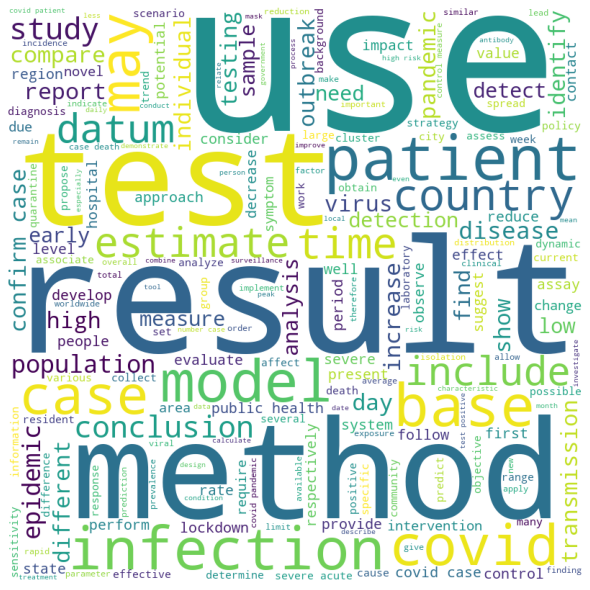

In [ ]:
plot_model(model=lda, plot='wordcloud')

-------
### topic wise word-cloud
-------

In [ ]:
lda_df = assign_model(lda)

In [ ]:
import numpy as np

def extract_articles(lda_df, topic):
  text = []
  for idx, article in enumerate(lda_df.abstract):
    _topic = lda_df.iloc[idx, -2:-1].values.item()
    if _topic == topic:
      text.append(article)

  return np.array(text)

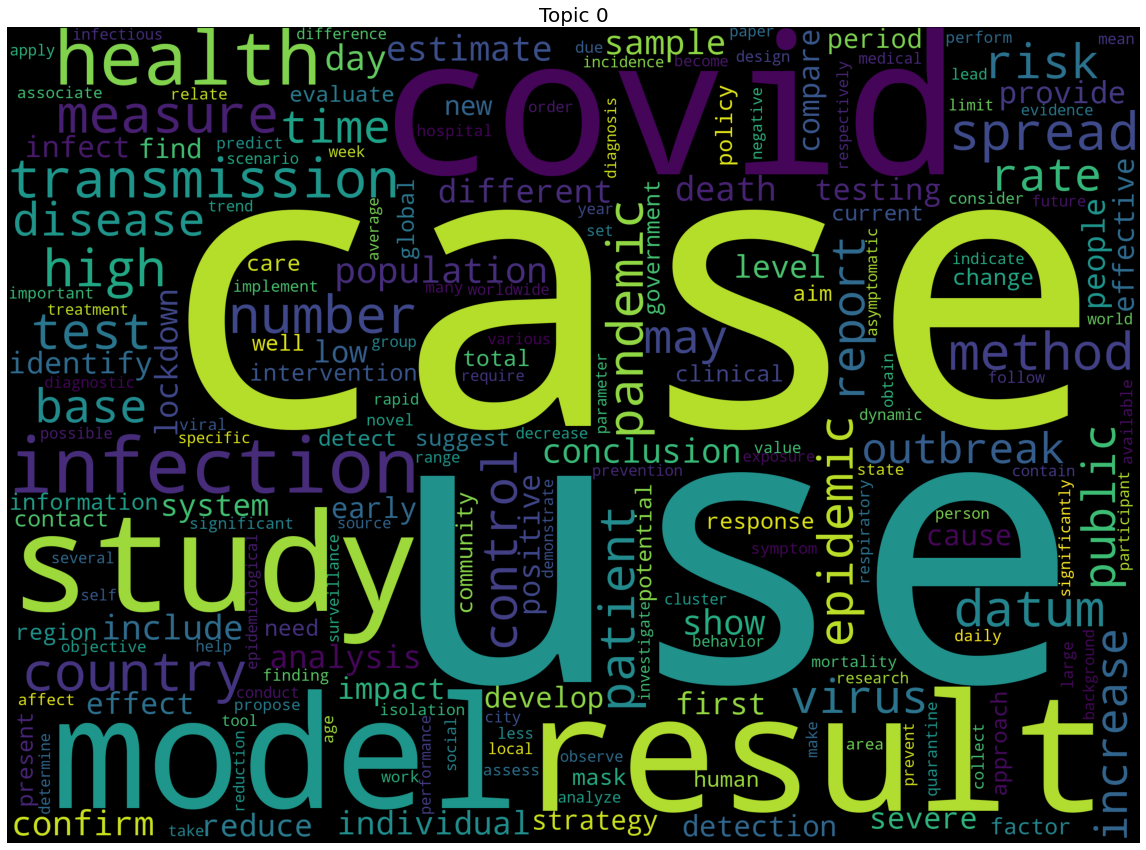

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 0'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title(topic,fontsize=20)
plt.imshow(cloud_topic)

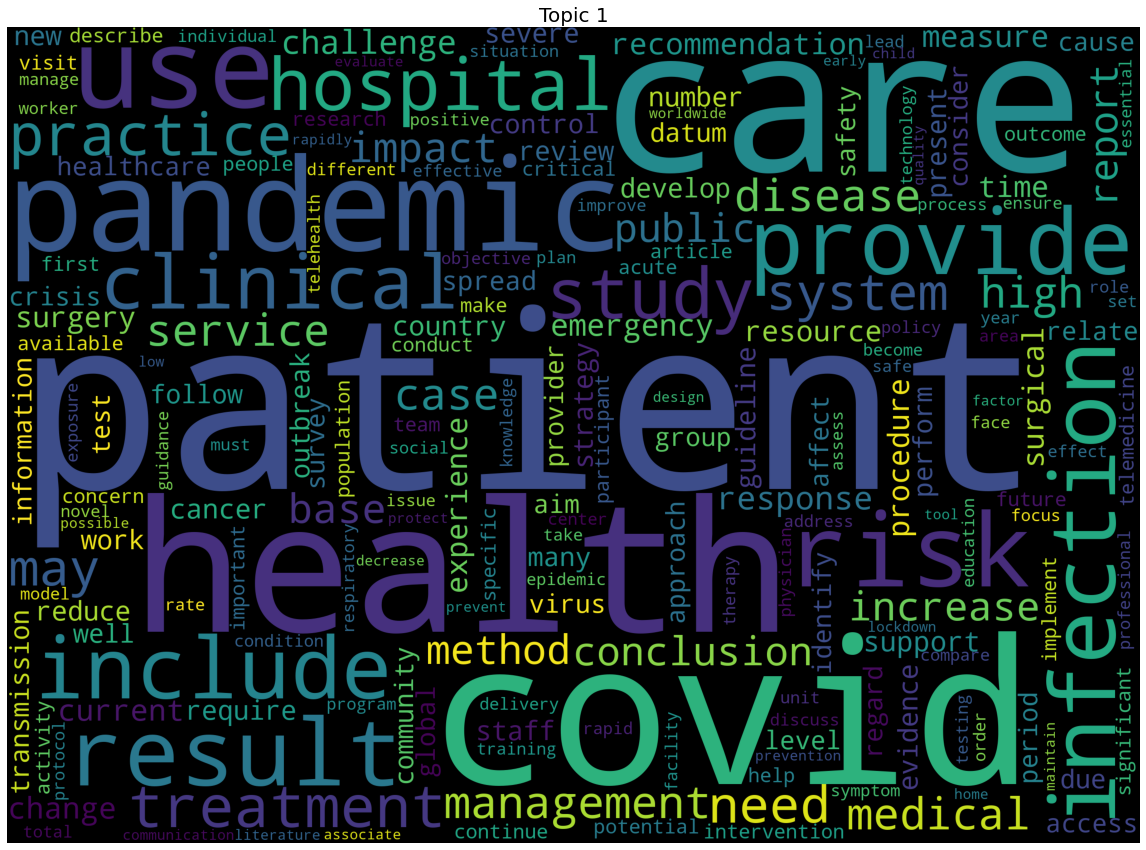

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 1'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title(topic,fontsize=20)
plt.imshow(cloud_topic)

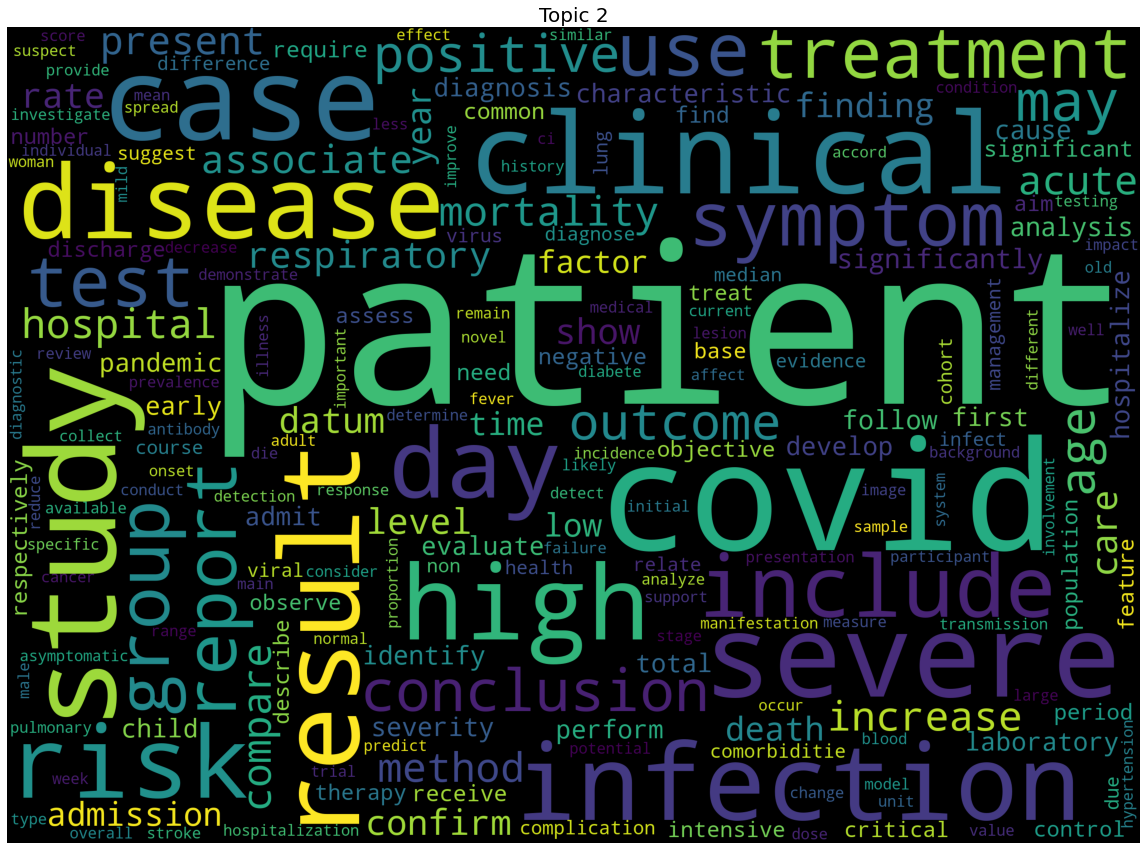

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 2'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')
plt.title(topic,fontsize=20)
plt.imshow(cloud_topic)

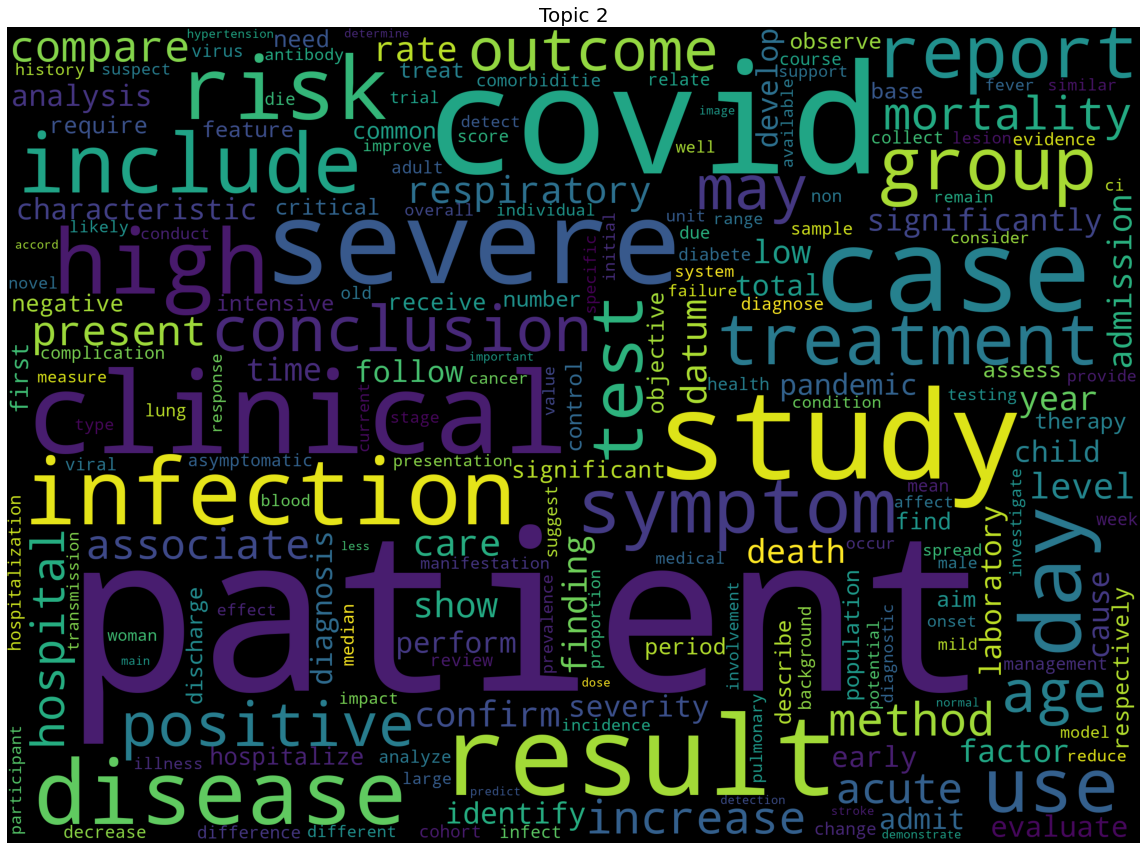

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize=(30, 15))

topic = 'Topic 2'
text = extract_articles(lda_df, topic)

cloud_topic = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800).generate(" ".join(text))

plt.axis('off')

plt.title(topic,fontsize=20)
plt.imshow(cloud_topic)